In [1]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("Datasets/forestfires.csv" )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [4]:
# Пропусков в данных нет
# Присутствуют два нечисловых столбцы

In [5]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [7]:
# Заменим месяц и день недели на числовые значения

In [8]:
data.month.unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [9]:
data.month = data.month.map({
                    'jan':0,
                    'feb':1,
                    'mar':2,
                    'apr':3,
                    'may':4,
                    'jun':5,
                    'jul':6,
                    'aug':7,
                    'sep':8,
                    'oct':9,
                    'nov':10,
                    'dec':11
                    })

In [10]:
data.day.unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [11]:
data.day = data.day.map({
                    'mon':0,
                    'tue':1,
                    'wed':2,
                    'thu':3,
                    'fri':4,
                    'sat':5,
                    'sun':6
                    })

In [12]:
data.sort_values('area', ascending=False)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
238,6,5,8,5,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,7,3,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,6,0,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53
237,1,2,8,1,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
236,2,2,8,5,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,3,4,2,5,91.7,35.8,80.8,7.8,11.6,30,6.3,0.0,0.00
115,3,5,2,1,88.1,25.7,67.6,3.8,15.5,27,6.3,0.0,0.00
114,3,4,2,1,88.1,25.7,67.6,3.8,15.8,27,7.6,0.0,0.00
113,3,4,8,0,91.8,78.5,724.3,9.2,18.9,35,2.7,0.0,0.00


In [13]:
data.corr()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


<Axes: >

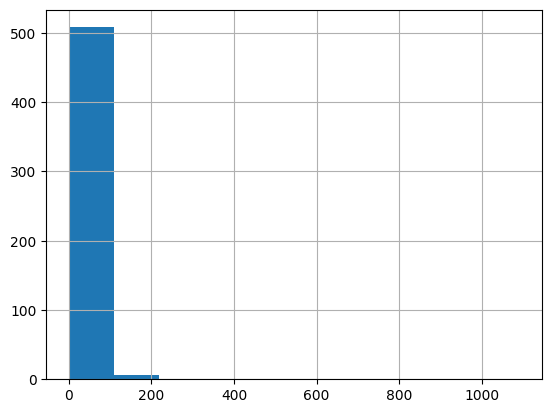

In [14]:
data.area.hist()

In [15]:
# Целевой признак почти всегда равен 0 (пожара нет)
# Посмотрим на ненулевые площади

<Axes: >

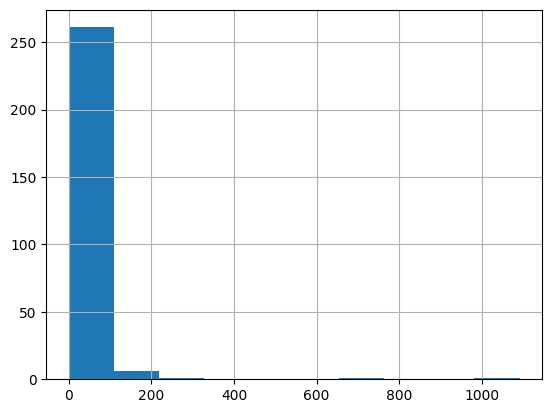

In [16]:
data.loc[data['area'] > 0].area.hist()

In [17]:
# Площадь пожара обычно мала, иногда равна около 200, крайне редко равна 700 и 1000

In [18]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,2,4,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,9,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,9,5,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,2,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,2,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [19]:
# Приступим к построению моделей

In [20]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression   
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import Lasso, Ridge
import matplotlib.pyplot as plt

In [21]:
X = data.drop(columns=['area'])
y = data.area

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6)

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print('Обучающая:', lin_reg.score(X_train, y_train))
print('Тестовая:', lin_reg.score(X_test, y_test))
print('Кросс-валидация:', np.mean(cross_val_score(lin_reg, X, y, cv=5)))

Обучающая: 0.022771559953436604
Тестовая: -0.0018250799404713192
Кросс-валидация: -1.8761354431507122


In [23]:
# Плохие результаты даже на тестовой выборке. Надо ввести многочлены

In [24]:
pr = Pipeline([('poly', PolynomialFeatures(degree=2)), ('regr', LinearRegression())])

param_grid = {'poly__degree': range(1, 5)}

grid = GridSearchCV(pr, param_grid, cv=5)

grid.fit(X, y)

print(grid.best_score_)
print(grid.best_params_)

-1.876135443150714
{'poly__degree': 1}


In [25]:
# Они ухудшают ситуацию. Нужно ввести в конвейер масштабаторы

In [26]:
sc_pr = Pipeline([('poly', PolynomialFeatures(degree=2)),
                    ('scaler', StandardScaler()),
                    ('regr', LinearRegression())])

param_grid = {'poly__degree': range(1, 5)}

grid = GridSearchCV(pr, param_grid, cv=5)

grid.fit(X, y)

print(grid.best_score_)
print(grid.best_params_)

-1.876135443150714
{'poly__degree': 1}


In [27]:
sc_pr = Pipeline([('poly', PolynomialFeatures(degree=2)),
                    ('scaler', MinMaxScaler()),
                    ('regr', LinearRegression())])

param_grid = {'poly__degree': range(1, 5)}

grid = GridSearchCV(pr, param_grid, cv=5)

grid.fit(X, y)

print(grid.best_score_)
print(grid.best_params_)

-1.876135443150714
{'poly__degree': 1}


In [28]:
# Ситуация слишком плоха. Надо узнать почему

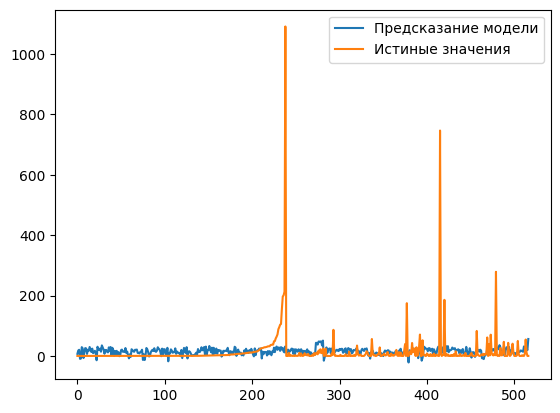

In [29]:
plt.plot(lin_reg.predict(X), label = 'Предсказание модели')
plt.plot(y, label = 'Истиные значения')
plt.legend()
plt.show()

In [30]:
# Модель неплохо предсказывает значения близкие к нулю, но совершенно не отражает большую площадь пожара
# Стоит изменить исходные данные, допустим, логарифмическим преобразованием (из-за склонности к нулю)

In [31]:
import math

data1 = data.copy(deep=True)

data1.area = data.area.apply(lambda x: math.log10(x) if x > 0 else x)

<Axes: >

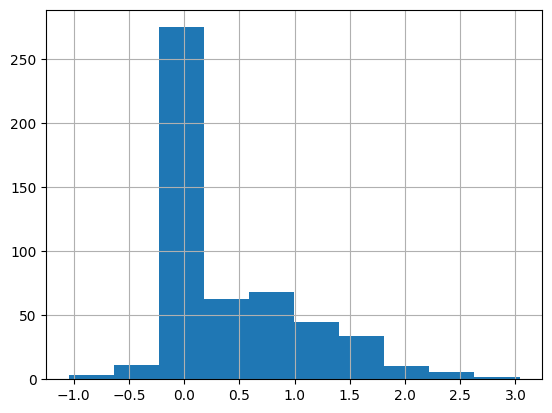

In [32]:
data1.area.hist()

In [33]:
X1 = data1.drop(columns=['area'])
y1 = data1.area

X_train, X_test, y_train, y_test = train_test_split(X1, y1, train_size = 0.6)

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print('Обучающая:', lin_reg.score(X_train, y_train))
print('Тестовая:', lin_reg.score(X_test, y_test))
print('Кросс-валидация:', np.mean(cross_val_score(lin_reg, X1, y1, cv=5)))

Обучающая: 0.047586099796043
Тестовая: -0.2009304989605143
Кросс-валидация: -0.227901500396694


In [35]:
# Стало немного лучше, но этого недостаточно

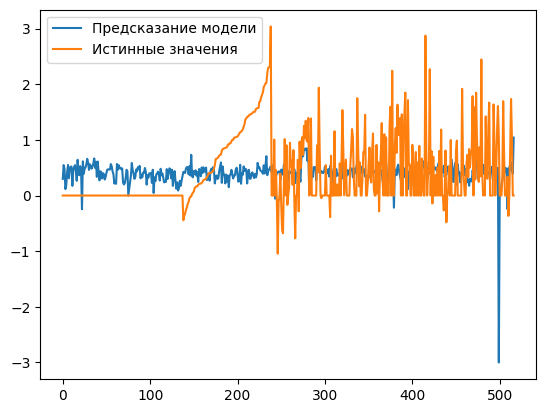

In [36]:
plt.plot(lin_reg.predict(X1), label = 'Предсказание модели')
plt.plot(y1, label = 'Истинные значения')
plt.legend()
plt.show()

In [37]:
# Истинные значения выглядят намного хуже
# Возможно, максимальные значения целевого признака впринципе невозможно предсказать

In [38]:
data2 = data.loc[data['area'] < 10]

X2 = data2.drop(columns=['area'])
y2 = data2.area

X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size = 0.6)

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print('Обучающая:', lin_reg.score(X_train, y_train))
print('Тестовая:', lin_reg.score(X_test, y_test))
print('Кросс-валидация:', np.mean(cross_val_score(lin_reg, X2, y2, cv=5)))

Обучающая: 0.023937605623302605
Тестовая: -0.03798680270906374
Кросс-валидация: -1.1610522821236595


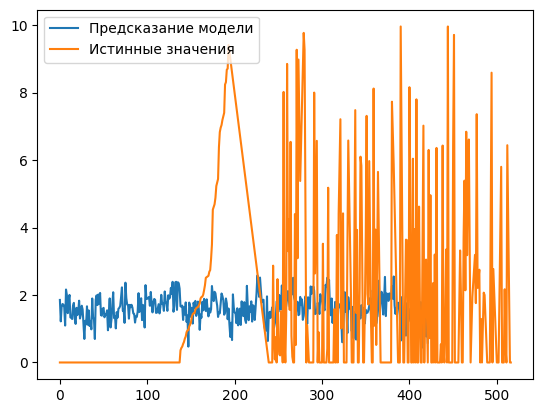

In [40]:
plt.plot(lin_reg.predict(X2), label = 'Предсказание модели')
plt.plot(y2, label = 'Истинные значения')
plt.legend()
plt.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6)

In [42]:
# Стоит попробовать другие модели на исходных данных

In [43]:
las = Lasso()
las.fit(X_train, y_train)
print('Обучающая:', las.score(X_train, y_train))
print('Тестовая:', las.score(X_test, y_test))
print('Кросс-валидация:', np.mean(cross_val_score(las, X, y, cv=5)))

Обучающая: 0.03499726163500194
Тестовая: -0.9184751329719814
Кросс-валидация: -1.6733339040221005


In [44]:
rid = Ridge()
rid.fit(X_train, y_train)
print('Обучающая:', rid.score(X_train, y_train))
print('Тестовая:', rid.score(X_test, y_test))
print('Кросс-валидация:', np.mean(cross_val_score(rid, X, y, cv=5)))

Обучающая: 0.03567327868700021
Тестовая: -0.9969937967466653
Кросс-валидация: -1.8736634037122317


In [45]:
# Почти та же самая ситуация
# Далее те же модели обучаются на логарифмических данных

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, train_size = 0.6)

In [47]:
las = Lasso()
las.fit(X_train, y_train)
print('Обучающая:', las.score(X_train, y_train))
print('Тестовая:', las.score(X_test, y_test))
print('Кросс-валидация:', np.mean(cross_val_score(las, X1, y1, cv=5)))

Обучающая: 0.009121924202751819
Тестовая: -0.023836713943163668
Кросс-валидация: -0.07451509716213774


In [48]:
rid = Ridge()
rid.fit(X_train, y_train)
print('Обучающая:', rid.score(X_train, y_train))
print('Тестовая:', rid.score(X_test, y_test))
print('Кросс-валидация:', np.mean(cross_val_score(rid, X1, y1, cv=5)))

Обучающая: 0.046377733416807065
Тестовая: -0.04644622008411203
Кросс-валидация: -0.18993155706007853


In [49]:
pr = Pipeline([('poly', PolynomialFeatures(degree=2)), ('regr', Lasso())])

param_grid = {'poly__degree': range(1, 3)}

grid = GridSearchCV(pr, param_grid, cv=10)

grid.fit(X1, y1)

print(grid.best_score_)
print(grid.best_params_)

-1.9117878137015178
{'poly__degree': 1}


/Users/hass/Documents/Code/ML/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.225e+01, tolerance: 1.909e-02
  model = cd_fast.enet_coordinate_descent(
/Users/hass/Documents/Code/ML/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.748e+01, tolerance: 1.909e-02
  model = cd_fast.enet_coordinate_descent(
/Users/hass/Documents/Code/ML/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

In [50]:
pr = Pipeline([('poly', PolynomialFeatures(degree=2)), ('regr', Ridge())])

param_grid = {'poly__degree': range(1, 3)}

grid = GridSearchCV(pr, param_grid, cv=10)

grid.fit(X1, y1)

print(grid.best_score_)
print(grid.best_params_)

-2.2138782040176297
{'poly__degree': 1}


In [51]:
sc = Pipeline([('poly', PolynomialFeatures(degree=2)),
                    ('scaler', StandardScaler()),
                    ('regr', LinearRegression())])

param_grid = {'poly__degree': range(1, 3)}

grid = GridSearchCV(sc, param_grid, cv=10)

grid.fit(X1, y1)

print(grid.best_score_)
print(grid.best_params_)

-2.2447222198101735
{'poly__degree': 1}


In [52]:
sc = Pipeline([('poly', PolynomialFeatures(degree=2)),
                    ('scaler', MinMaxScaler()),
                    ('regr', LinearRegression())])

param_grid = {'poly__degree': range(1, 3)}

grid = GridSearchCV(sc, param_grid, cv=10)

grid.fit(X1, y1)

print(grid.best_score_)
print(grid.best_params_)

-2.2447222198101895
{'poly__degree': 1}


In [53]:
pr = Pipeline([('poly', PolynomialFeatures(degree=2)), ('regr', LinearRegression())])

param_grid = {'poly__degree': range(1, 3)}

grid = GridSearchCV(pr, param_grid, cv=10)

grid.fit(X1, y1)

print(grid.best_score_)
print(grid.best_params_)

-2.2447222198101833
{'poly__degree': 1}


In [54]:
# И на минимальных данных

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size = 0.6)

In [56]:
las = Lasso()
las.fit(X_train, y_train)
print('Обучающая:', las.score(X_train, y_train))
print('Тестовая:', las.score(X_test, y_test))
print('Кросс-валидация:', np.mean(cross_val_score(las, X2, y2, cv=5)))

Обучающая: 0.0007963637785579625
Тестовая: -0.018600662380851007
Кросс-валидация: -0.6604804688755521


In [57]:
rid = Ridge()
rid.fit(X_train, y_train)
print('Обучающая:', rid.score(X_train, y_train))
print('Тестовая:', rid.score(X_test, y_test))
print('Кросс-валидация:', np.mean(cross_val_score(rid, X2, y2, cv=5)))

Обучающая: 0.05344716045675757
Тестовая: -0.06265055120402407
Кросс-валидация: -1.1596442811924768


In [58]:
# "Лучшие" результаты - на логарифмических
# Но в целом они плохие
# Далее идёт настройка гиперпараметров

In [59]:
las = Lasso(alpha=1)
las.fit(X_train, y_train)
print('Обучающая:', las.score(X_train, y_train))
print('Тестовая:', las.score(X_test, y_test))
print('Кросс-валидация:', np.mean(cross_val_score(las, X2, y2, cv=5)))

Обучающая: 0.0007963637785579625
Тестовая: -0.018600662380851007
Кросс-валидация: -0.6604804688755521


In [60]:
# Стало хуже. По умолчанию альфа - 0, с 1 стало хуже. Значит лучшее значение - 0

In [61]:
las = Lasso(tol=1e-2)
las.fit(X_train, y_train)
print('Обучающая:', las.score(X_train, y_train))
print('Тестовая:', las.score(X_test, y_test))
print('Кросс-валидация:', np.mean(cross_val_score(las, X2, y2, cv=5)))

Обучающая: 0.0007925215814851283
Тестовая: -0.018572173538262682
Кросс-валидация: -0.6604943017170519


In [62]:
las = Lasso(tol=1e-6)
las.fit(X_train, y_train)
print('Обучающая:', las.score(X_train, y_train))
print('Тестовая:', las.score(X_test, y_test))
print('Кросс-валидация:', np.mean(cross_val_score(las, X2, y2, cv=5)))

Обучающая: 0.0007963962371363431
Тестовая: -0.01860090518948554
Кросс-валидация: -0.6604803694868073


In [63]:
# Параметр tol ни на что не влияет. Остаётся по умолчанию

In [64]:
rid = Ridge(alpha=1)
rid.fit(X_train, y_train)
print('Обучающая:', rid.score(X_train, y_train))
print('Тестовая:', rid.score(X_test, y_test))
print('Кросс-валидация:', np.mean(cross_val_score(rid, X2, y2, cv=5)))

Обучающая: 0.05344716045675757
Тестовая: -0.06265055120402407
Кросс-валидация: -1.1596442811924768


In [65]:
rid = Ridge(alpha=10)
rid.fit(X_train, y_train)
print('Обучающая:', rid.score(X_train, y_train))
print('Тестовая:', rid.score(X_test, y_test))
print('Кросс-валидация:', np.mean(cross_val_score(rid, X2, y2, cv=5)))

Обучающая: 0.052103932746549675
Тестовая: -0.06201436731006282
Кросс-валидация: -1.1478035188513576


In [66]:
# Изменение альфа ухудшает результат

In [67]:
rid = Ridge(tol=1e-2)
rid.fit(X_train, y_train)
print('Обучающая:', rid.score(X_train, y_train))
print('Тестовая:', rid.score(X_test, y_test))
print('Кросс-валидация:', np.mean(cross_val_score(rid, X2, y2, cv=5)))

Обучающая: 0.05344716045675757
Тестовая: -0.06265055120402407
Кросс-валидация: -1.1596442811924768


In [68]:
rid = Ridge(tol=1e-6)
rid.fit(X_train, y_train)
print('Обучающая:', rid.score(X_train, y_train))
print('Тестовая:', rid.score(X_test, y_test))
print('Кросс-валидация:', np.mean(cross_val_score(rid, X2, y2, cv=5)))

Обучающая: 0.05344716045675757
Тестовая: -0.06265055120402407
Кросс-валидация: -1.1596442811924768


In [69]:
# Параметр tol ни на что не влияет

In [70]:
# Можно подвести следующие итоги
# Данный датасет плохо подходит для построения моделей
# В нём мало строк, а целевой признак почти везде - 0. 
# Не спасает даже логарифмическое преобразование, которое советуется в данных случаях
# Редкие значения не равные 0 иногда слишком велики, чтобы модель могла адекватно их предсказать
# Возникновение пожара, возможно, вообще нельзя предсказать по этим данным, так как не наблюдается заномерности в них
# По матрице корреляций можно заметить небольшую зависимоть от температуры, но она не настолько ярко выражена, 
# чтобы моделовать значения и 0, и 10, и 1000
#
# В итоге лучшими моделями оказались Lasso и Ridge с предварительным логарифмическим преобразованием данных,
# однако их результаты далеки от желаемых